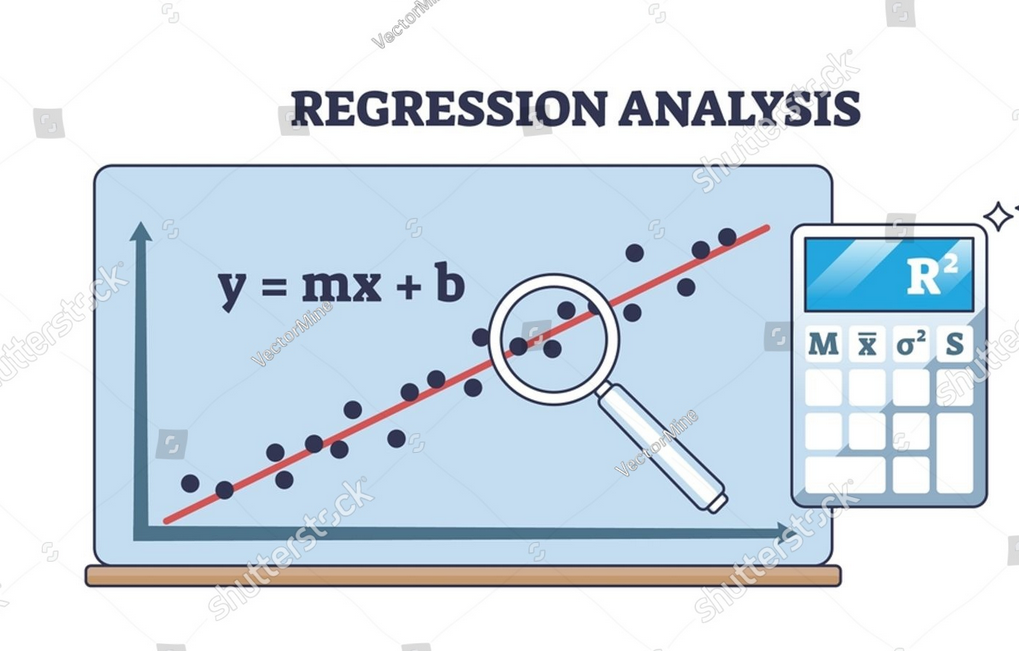

In [197]:
from IPython.display import Image, display
display(Image(filename="C:\\Users\\HP\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-01-04 012439.png"))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
df =pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.info

<bound method DataFrame.info of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ... 

## Exploratory Data Analysis
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
sns.set_style('whitegrid')
sns.set_palette('deep')

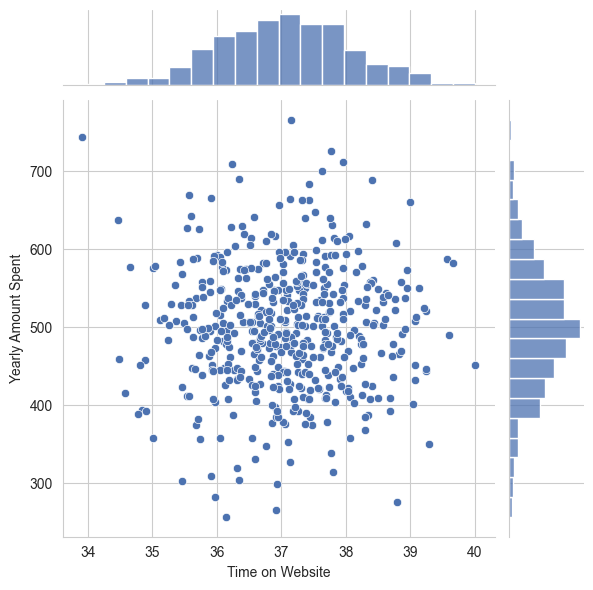

In [13]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')
plt.show()

** Do the same but with the Time on App column instead. **

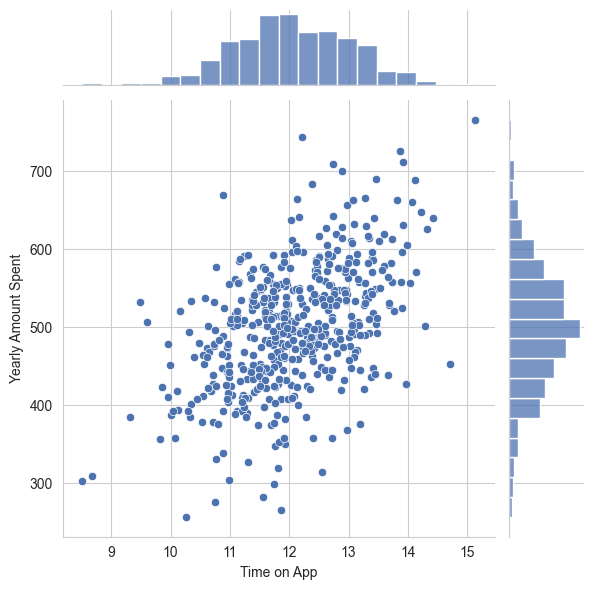

In [15]:
sns.jointplot(data = df,x='Time on App',y ='Yearly Amount Spent')
plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

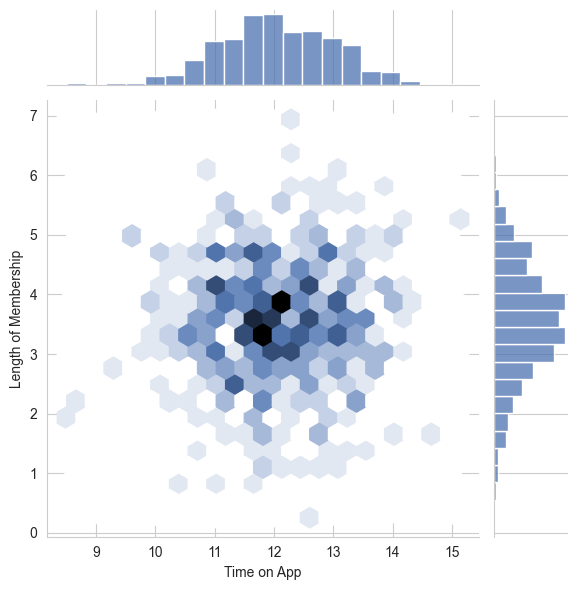

In [17]:
sns.jointplot(data=df,x='Time on App',y='Length of Membership',kind='hex')
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

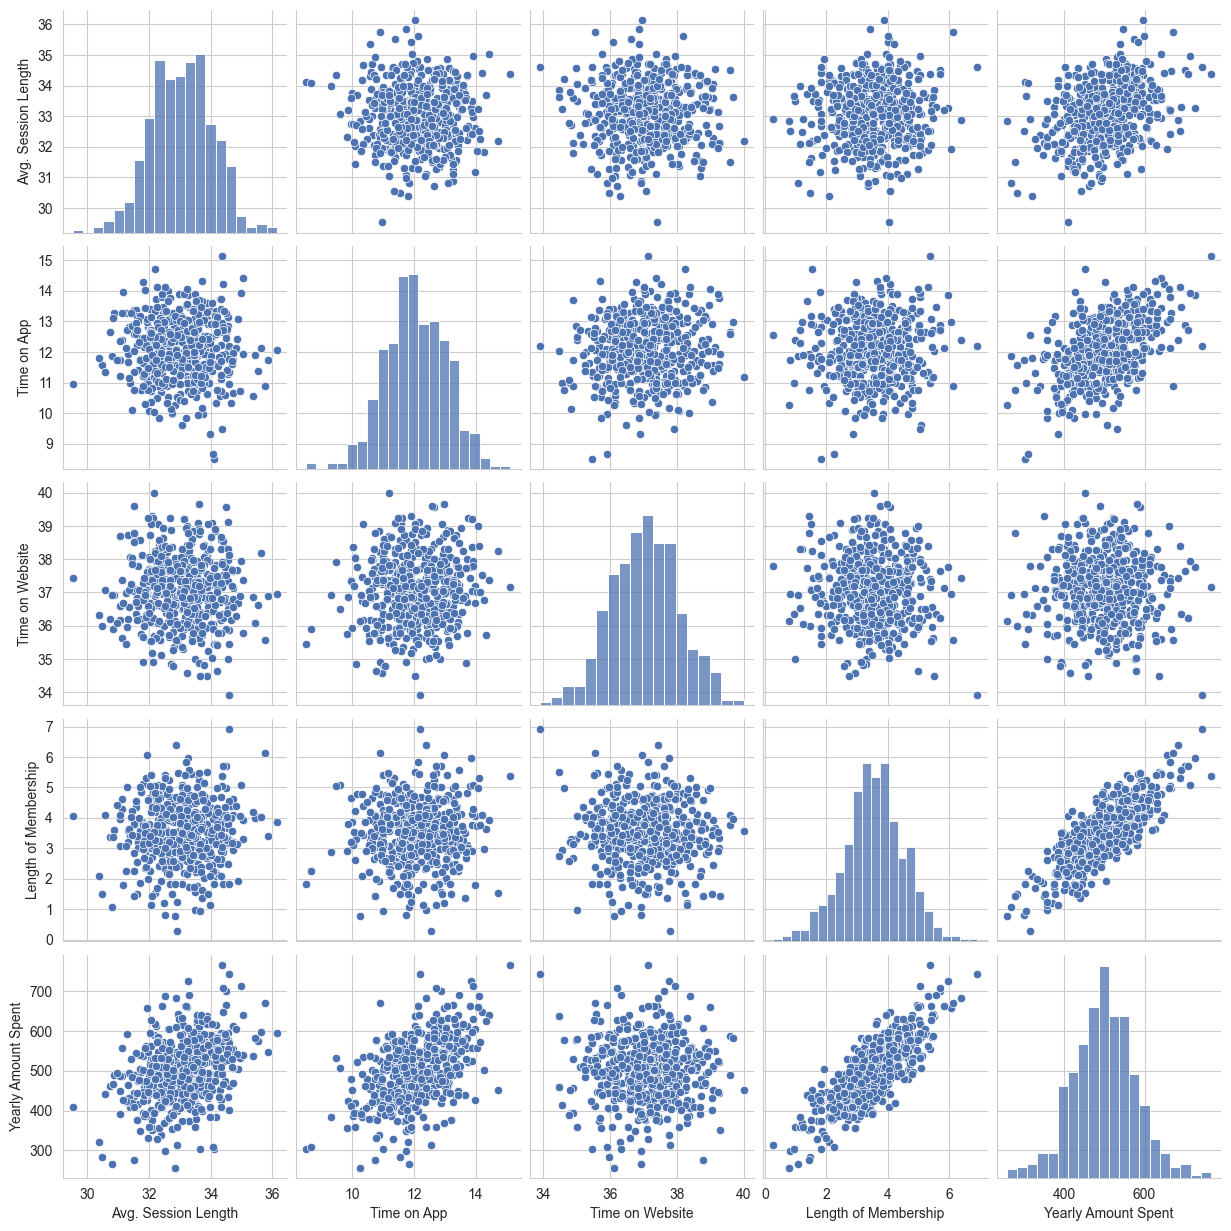

In [19]:
sns.pairplot(df)
plt.show()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [57]:
#Length of Membership#

In [21]:
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix["Yearly Amount Spent"].sort_values(ascending=False))

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

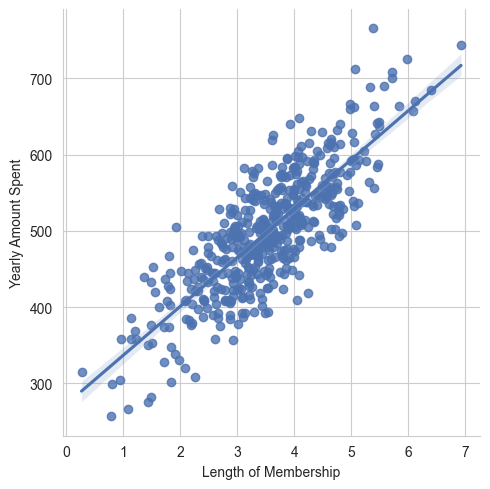

In [31]:
sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent')
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [33]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [35]:
y =df['Yearly Amount Spent']

In [39]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

## Training the Model

** Import LinearRegression from sklearn.linear_model **

In [49]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [59]:
lm = LinearRegression

In [81]:
print(X_train.dtypes)  # Check data types for X_train
print(y_train.dtype)   # Check data type for y_train



Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
dtype: object
float64


In [69]:
print(X_train.isnull().sum())  # Check for NaN values in each column
print(y_train.isnull().sum())  # Check for NaN values

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
dtype: int64
0


In [77]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(350, 4)
(350,)


** Train/fit lm on the training data.**

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Convert to NumPy arrays
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else np.array(y_train)

# Initialize and fit the model
lm = LinearRegression()
lm.fit(X_train_np, y_train_np)

# Print the intercept
print("Intercept:", lm.intercept_)


Intercept: -1047.932782250239


In [111]:
lm.fit(X_train_np, y_train_np)
print(lm.intercept_)

-1047.932782250239


**Print out the coefficients of the model**

In [113]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
** Use lm.predict() to predict off the X_test set of the data.**

In [125]:
predictions = lm.predict(X_train_np)

** Create a scatterplot of the real test values versus the predicted values. **

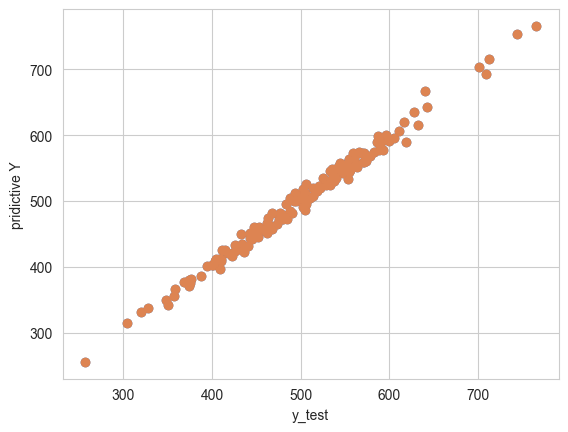

In [129]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('pridictive Y')
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [143]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('r2:',metrics.r2_score(y_test,prediction))


MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864
r2: 0.9890046246741234


In [147]:
metrics.explained_variance_score(y_test,prediction)

0.9890771231889607

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

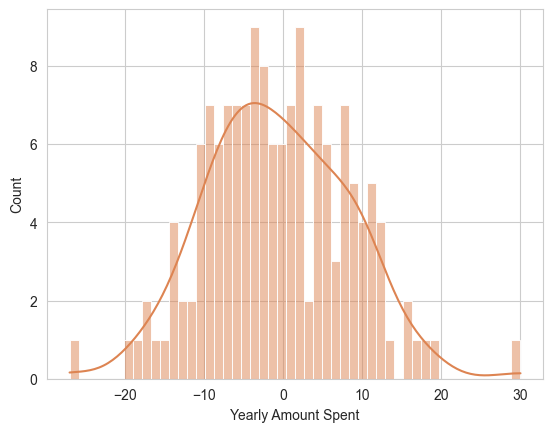

In [155]:
sns.histplot((y_test-prediction),bins=50,kde=True)
plt.show()

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [171]:
Coefficients = pd.DataFrame(lm.coef_,X.columns)
Coefficients.columns = ['Coefficients']
Coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

**Interpreting the coefficients:

   ** Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
    Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.



**Do you think the company should focus more on their mobile app or on their website?**

** This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
